## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```

In [25]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [33]:
titanic_data = pd.read_csv("./titanic.csv")

In [34]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***Висновки:***
<hr/>
1. Є багато пропущених -> Age ***177***  Вік можна заповнити медіанним значенням.
<br/>2. Пропущено 2 значення -> Embarked. Датасет містить орієнтовно практично 900 рядків, 2 пропуски не вплинуть на результати аналізу.
<br/>3. Велика кількість значень відсутня -> Cabin ***687***  Ці пропуски заповнити оптимальними значеннями не вдастся.

***Завдання 3:*** Побудувати матрицю кореляції



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



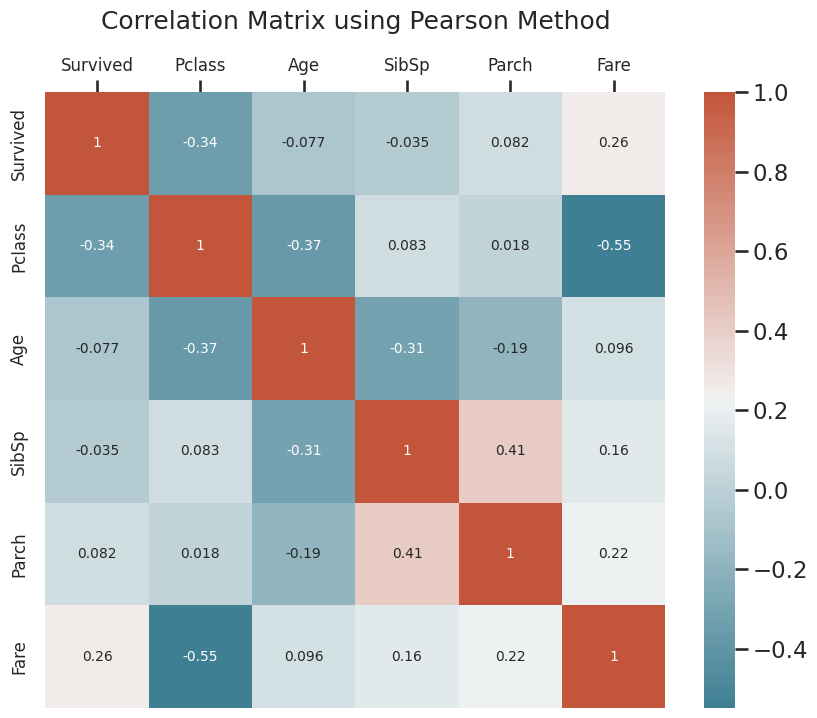

In [ ]:
numeric_data = titanic_data.select_dtypes(include=['number']).drop(["PassengerId"], axis="columns")

correlation_matrix = numeric_data.corr(method='pearson')

fig, ax = plt.subplots(figsize=(10, 8))
color_map = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=color_map, ax=ax, annot_kws={'size': 10})
ax.tick_params(labelsize=12)
ax.xaxis.tick_top()
ax.set_title('Correlation Matrix using Pearson Method', pad=20)

plt.show()

Висновки з аналізу кореляційної матриці:

Зв'язки між класом і іншими змінними:

Клас та ціна квитка (Pclass і Fare): Значний негативний кореляційний зв'язок (-0.55) вказує на те, що чим вищий клас (менше числове значення), тим вища ціна квитка. Це логічно, адже перший клас вважається найбільш престижним.
Клас та вік (Pclass і Age): Кореляція -0.37 показує, що у перших класах переважно більш дорослі пасажири, в той час як у третьому класі можуть бути молодші особи.
Клас та виживаність (Pclass і Survived): Кореляція -0.34 свідчить про кращі шанси на виживання у пасажирів вищих класів, що може бути зумовлено кращим розміщенням на судні та доступом до шлюпок.
Зв'язки між кількістю родичів на борту:

SibSp і Parch: Позитивна кореляція (0.41) підтверджує, що пасажири, які подорожували з родиною, часто мали на борту як супутників, так і дітей або батьків.
SibSp і Age: Кореляція -0.31 може вказувати на те, що молодші люди частіше подорожували з братами, сестрами або супругами.
Зв'язки між ціною квитка і виживаністю:

Ціна квитка та виживаність (Fare і Survived): Кореляція 0.26 підтверджує, що особи, які заплатили більше за квиток, мали вищі шанси на виживання, можливо, завдяки кращому розташуванню кают.
Загальний висновок: Аналіз кореляцій показує, що деякі атрибути мають важливе значення для виживання та комфорту на борту. Високі або низькі кореляційні значення вказують на потенційні ключові зв'язки, які можуть бути використані для глибшого розуміння соціально-економічних аспектів пасажирів Титаніка. Ці відомості можуть бути корисними для подальшого аналізу або для розробки моделей прогнозування виживаності.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [ ]:
def fill_missing_values(df, column_name, group_columns):
    df_copy = df.copy()
    df_copy[column_name] = df_copy.groupby(group_columns)[column_name].transform(lambda x: x.fillna(x.median()))
    return df_copy

print("Initial data sample:")
display(titanic_data.head(10))

processed_data = fill_missing_values(titanic_data, "Age", ["Pclass", "Sex"])

print("\nData sample after filling missing values:")
display(processed_data.head(10))

median_before = titanic_data["Age"].median()
median_after = processed_data["Age"].median()

print(f"Median age before filling: {median_before}")
print(f"Median age after filling: {median_after}")

print("\nMissing values count per column after processing:")
display(processed_data.isnull().sum())

Initial data sample:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



Data sample after filling missing values:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Median age before filling: 28.0
Median age after filling: 26.0

Missing values count per column after processing:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Висновки з аналізу заповнення даних:** <br>
***Ефективність методу заповнення:*** <br> Використання функції для заповнення пропущених значень у колонці "Age" дозволило повністю усунути прогалини в даних. Це важливо для подальшого аналізу, оскільки повнота даних є ключовою для точності статистичних висновків. Заповнення пропущених значень медіаною є особливо ефективним, адже медіана стійка до викидів, що робить цей метод більш надійним порівняно з використанням середнього значення.
<hr>

***Вплив на статистичні показники:*** <br> До процесу заповнення медіана віку в датасеті становила 28 років, після заповнення цей показник знизився до 26 років. Це свідчить про те, що більшість пропущених значень віку належала до молодших вікових груп, які тепер адекватно представлені в датасеті. Зміна медіани на два роки вниз вказує на те, що вік багатьох пасажирів, які не мали вказаного віку, був нижчий за загальний середній віковий поріг.


***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні.

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків.


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





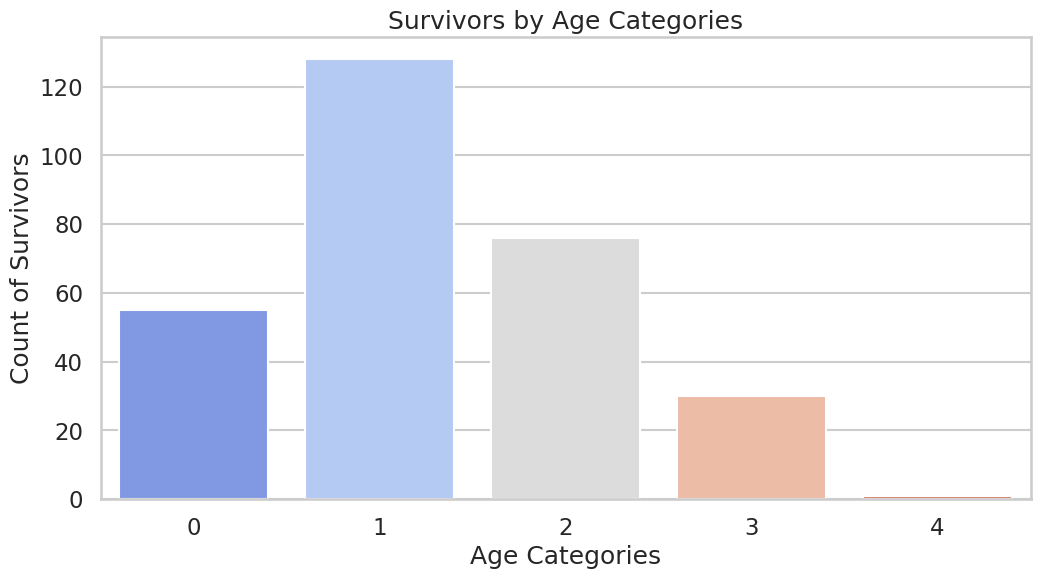

Асиметрія: 0.38910778230082704. Розподіл має важчий правий хвіст.


In [ ]:
age_bins = [0, 16, 32, 48, 64, 80]
age_labels = [0, 1, 2, 3, 4]

titanic_data["Age_bin"] = pd.cut(titanic_data["Age"], bins=age_bins, labels=age_labels)

survivors = titanic_data[titanic_data["Survived"] == 1]

fig, ax = plt.subplots(figsize=(12, 6))
palette = sns.color_palette("coolwarm", 5)
sns.countplot(x="Age_bin", data=survivors, palette=palette, ax=ax)

ax.set_xlabel("Age Categories")
ax.set_ylabel("Count of Survivors")
ax.set_title("Survivors by Age Categories")

plt.show()

skewness = titanic_data["Age"].skew()
skewness_description = f"Асиметрія: {skewness}. "
if skewness > 0:
    skewness_description += "Розподіл має важчий правий хвіст."
elif skewness < 0:
    skewness_description += "Розподіл має важчий лівий хвіст."
else:
    skewness_description += "Розподіл симетричний."

print(skewness_description)


1. Графік має важчий правий хвіст, що говорить про те, що люди віком від ***32 до 80 років*** мали гіршу статистику виживаня за молодших людей.
2. Найбільше людей вижило з 1 вікової категорії ***(від 16 до 32 років)***, більше 175.
3. Найменше вижило людей в останній 4 віковій категорії: ***(від 64 до 80 років)***.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали```
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

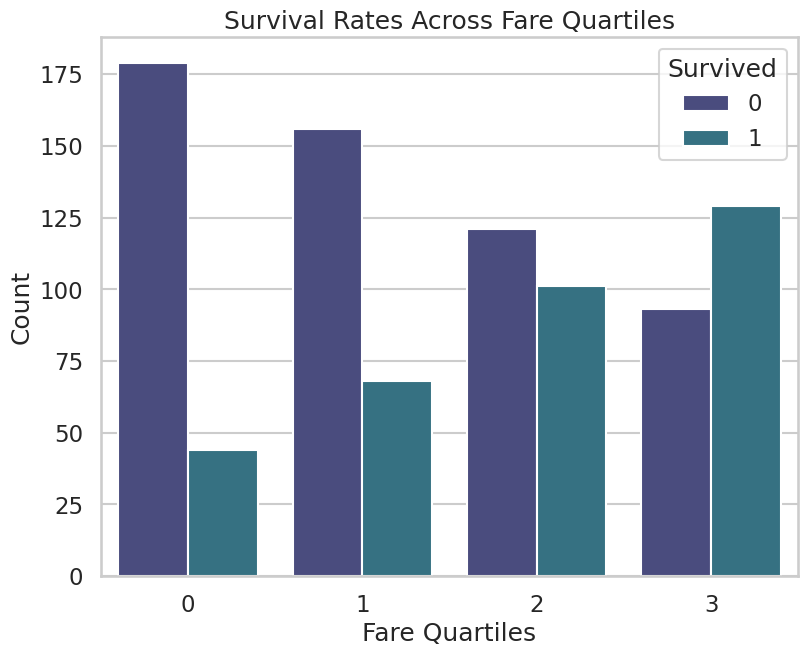

In [ ]:
titanic_data['Fare_bins'] = pd.qcut(titanic_data['Fare'], 4, labels=[0, 1, 2, 3])

fig, ax = plt.subplots(figsize=(9, 7))
palette = sns.color_palette("viridis", n_colors=4)
sns.countplot(x="Fare_bins", hue="Survived", data=titanic_data, palette=palette, ax=ax)
ax.set_title("Survival Rates Across Fare Quartiles")
ax.set_xlabel("Fare Quartiles")
ax.set_ylabel("Count")

plt.show()

**Висновки:**

З графіку видно, що **чим більш дорогими є квитки пасажирів, тим більша їхня ймовірність на виживання**. Тобто пасажири, які мали найдорожчі квитки (категорії 3), мали більші шанси на виживання. І навпаки, пасажири, які мали дешеві квитки (категорії 0), переважно загинули. Це обумовлюється тим, що квитки першого класу надавали більше переваг та комфорту, відповідно, шанси на виживання були вищими.

З цього можна зробити висновок, що **між ціною квитка та ймовірністю виживання пасажира є зв'язок**. Тому гіпотезу про взаємозв'язок між `Survived` та `Fare` приймаємо. Також, побудувавши матрицю кореляції, ми побачили, що ця пара атрибутів має непоганий зв'язок (0.26), тому для подальшого аналізу нам може бути корисним кодування на цю змінну.

Оскільки є взаємозв'язок між парою атрибутів `Survived` та `Fare`, це можна буде використовувати в моделях машинного навчання. Оскільки `Fare` містить безперервні змінні, буде доцільно використовувати кодування, щоб дані було легше опрацьовувати.


***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

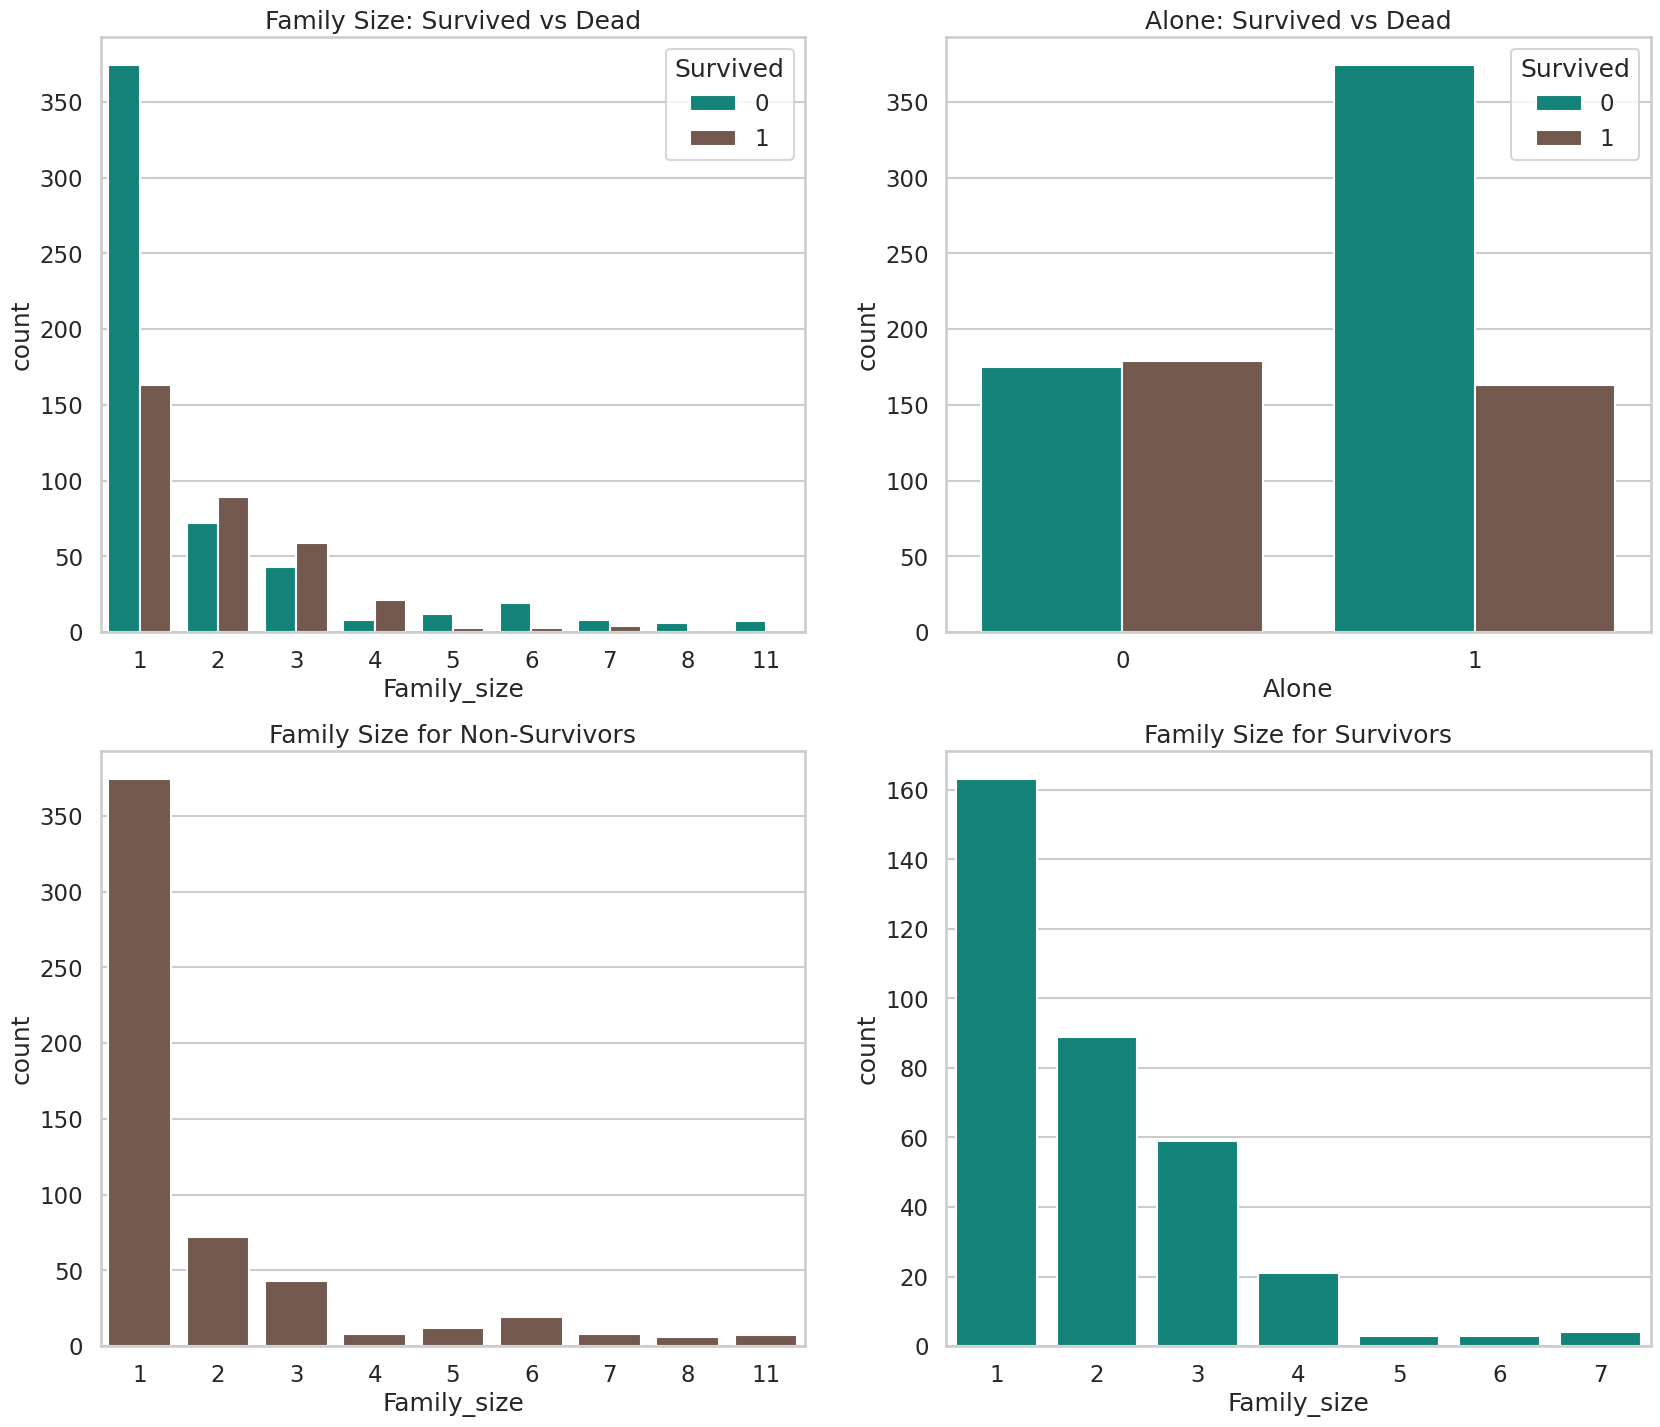

In [42]:
titanic_data['Family_size'] = titanic_data['Parch'] + titanic_data['SibSp'] + 1
titanic_data['Alone'] = (titanic_data['Family_size'] == 1).astype(int)

fig, axes = plt.subplots(2, 2, figsize=(20, 17))
palette = ['#009688', '#795548']

sns.countplot(x='Family_size', hue='Survived', data=titanic_data, palette=palette, ax=axes[0, 0])
axes[0, 0].set_title("Family Size: Survived vs Dead")

sns.countplot(x='Alone', hue='Survived', data=titanic_data, palette=palette, ax=axes[0, 1])
axes[0, 1].set_title("Alone: Survived vs Dead")

sns.countplot(x='Family_size', data=titanic_data[titanic_data['Survived'] == 0], color=palette[1], ax=axes[1, 0])
axes[1, 0].set_title("Family Size for Non-Survivors")

sns.countplot(x='Family_size', data=titanic_data[titanic_data['Survived'] == 1], color=palette[0], ax=axes[1, 1])
axes[1, 1].set_title("Family Size for Survivors")

plt.show()

***Висновки аналізу сімейних зв'язків на виживаність:***

- **Вплив розміру сім'ї:**
  1. **Найбільша зафіксована сім'я складалася з 11 членів.**
  2. **Пасажири, які були частиною сімей, мали кращі шанси на виживання, порівняно з тими, хто подорожував сам.**
  3. **Найкращі шанси на виживання спостерігалися у пасажирів з сім'єю розміром від 1 до 3 осіб.**
  4. **Великі сім'ї, які складалися з більше ніж трьох членів, мали нижчі шанси на виживання.**

- **Пасажири, що подорожували окремо (Alone):**
  1. **Значна кількість пасажирів, які подорожували окремо, не вижила, що може вказувати на менший доступ до ресурсів або інформації про евакуацію.**

**Загальний висновок:** Зібрані дані підтверджують гіпотезу, що сімейні зв'язки мали вплив на шанси виживання під час катастрофи. Пасажири з невеликими сім'ями мали кращі шанси на порятунок, тоді як індивідуальні пасажири та великі сім'ї зіштовхувалися з більшими викликами.


***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [ ]:
adjusted_dataset = titanic_data.drop(["Cabin", "Ticket", "PassengerId"], axis="columns")
display(adjusted_dataset.head(10))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


1. **Видалення атрибуту Cabin**:
   - Більшість значень в колонці `Cabin` пропущено. Заповнення цієї великої кількості пропущених даних оптимальними значеннями неможливе без внесення значущих спотворень, тому рекомендуємо видалити цю колонку з аналітичного датасету.

2. **Видалення колонки Ticket**:
   - Атрибут `Ticket`, який містить номери квитків, не містить інформації, яка б могла бути корисною для статистичного аналізу або побудови моделей машинного навчання, оскільки номери квитків є випадковими і не несуть в собі закономірностей.

3. **Видалення атрибуту PassengerId**:
   - Атрибут `PassengerId` є унікальним ідентифікатором кожного пасажира і не вносить значення в аналіз, адже не корелює з іншими характеристиками пасажирів або їхнім виживанням.

4. **Збереження та аналіз атрибуту Name**:
   - Незважаючи на те, що колонка `Name` містить унікальні значення, з неї можна витягти назви, що може бути корисним для визначення соціального статусу або звання, які потенційно впливають на шанси виживання. Також, цей атрибут дозволяє аналізувати найпопулярніші імена серед чоловіків і жінок.

***Висновок:***
Вибіркове видалення колонок сприяє покращенню якості моделів машинного навчання, оскільки видалення неінформативних змінних дозволяє зменшити шум у даних та сконцентрувати аналіз на значущих атрибутах. Процеси очищення даних слід розглядати як невід'ємну частину підготовки даних перед будь-якими серйозними аналітичними зусиллями.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [36]:
titanic_data['Title'] = titanic_data['Name'].apply(lambda name: name.split(",")[1].split(".")[0].strip())

title_map = {title: idx for idx, title in enumerate(titanic_data['Title'].unique())}
sex_map = {"male": 0, "female": 1}
embarked_map = {"S": 0, "C": 1, "Q": 2}

titanic_data['Title'] = titanic_data['Title'].map(title_map)
titanic_data['Sex'] = titanic_data['Sex'].map(sex_map)
titanic_data['Embarked'] = titanic_data['Embarked'].map(embarked_map)

print(titanic_data[['Sex', 'Embarked', 'Title']].head(10))

   Sex  Embarked  Title
0    0       0.0      0
1    1       1.0      1
2    1       0.0      2
3    1       0.0      1
4    0       0.0      0
5    0       2.0      0
6    0       0.0      0
7    0       0.0      3
8    1       0.0      1
9    1       1.0      1


***Висновки з перетворення категорійних даних у числові:***

1. **Перетворення статі (Sex):**
   - Категоріям `female` та `male` в колонці `Sex` були присвоєні числові значення `1` та `0` відповідно. Це дозволяє моделям машинного навчання ефективно обробляти цю інформацію як вхідні дані.

2. **Перетворення порту посадки (Embarked):**
   - Для портів посадки, позначених як `S`, `Q`, та `C` у колонці `Embarked`, були встановлені значення `0`, `1` та `2` відповідно. Це перетворення перетворює текстові мітки портів у числовий формат, що підвищує ефективність обробки даних.

3. **Перетворення тайтлів (Title):**
   - Назви, витягнуті з колонки `Name`, та відображені в новій колонці `Title`, були перекодовані в числовий діапазон від `0` до `16`. Кожен унікальний тайтл/назва отримав власне унікальне числове представлення, що значно спрощує подальшу роботу з цими даними у машинному навчанні.

**Загальний висновок:**
Таке перетворення даних є критично важливим для забезпечення сумісності з алгоритмами машинного навчання, які вимагають числових вхідних даних. Через це перекодування категорійних змінних у числові формати, ми значно покращуємо потенціал моделей для ефективного вивчення закономірностей у даних.


***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



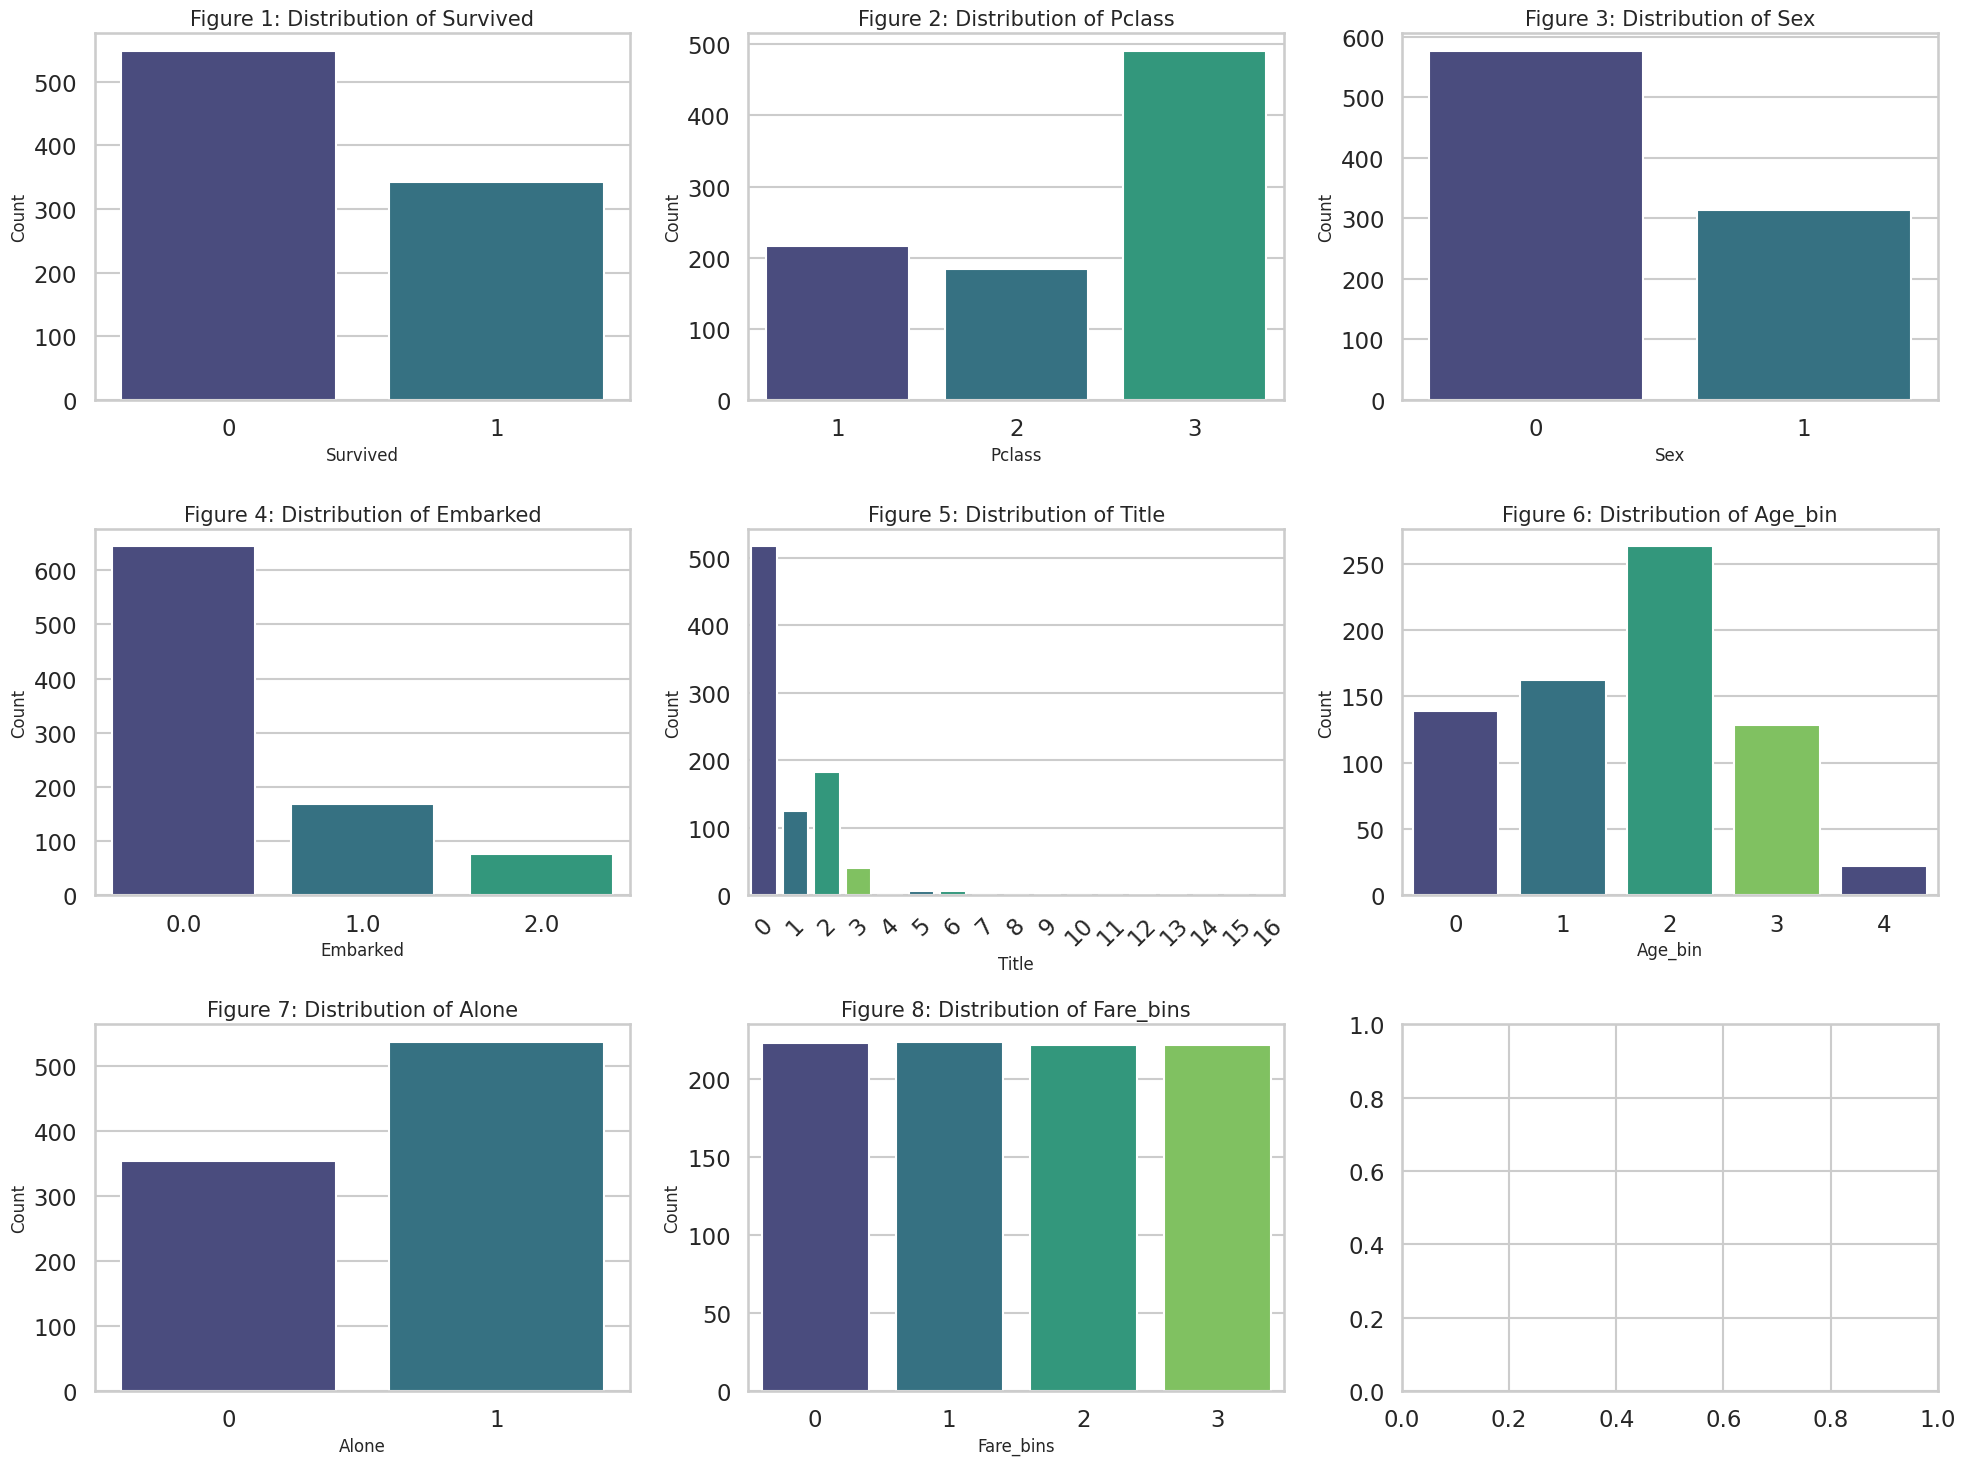

In [44]:
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Title', 'Age_bin', 'Alone', 'Fare_bins']

category_df = titanic_data[categorical_columns]

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
plt.subplots_adjust(hspace=0.45, wspace=0.35)

color_palette = sns.color_palette("viridis", n_colors=4)

for index, column in enumerate(category_df.columns):
    ax = axes[index // 3, index % 3]
    sns.countplot(x=column, data=category_df, ax=ax, palette=color_palette)
    ax.set_title(f"Figure {index + 1}: Distribution of {column}", fontsize=15)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    if column == "Title":
        ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

***Аналіз категоріальних змінних у датасеті Titanic:***

1. **Survived (Вижили/Загинули):**
   - Кількість загинулих значно переважає кількість виживших. Це підкреслює трагедію події.

2. **Pclass (Клас квитка):**
   - Переважна кількість пасажирів подорожувала третім класом, що вказує на більш доступні ціни квитків цього класу. Перший та другий класи мали значно меншу кількість пасажирів.

3. **Sex (Стать):**
   - Чоловіків на борту було значно більше, ніж жінок, що може бути пов'язано з тогочасними міграційними тенденціями чоловіків за роботою.

4. **Embarked (Порт посадки):**
   - Більшість пасажирів сіла на борт у Southampton, що був основним портом відправлення Титаніка. Найменше пасажирів сіло у Queenstown, що відображає меншу популярність цього маршруту або географічні особливості.

5. **Title (Титули):**
   - Широка гама титулів відображає соціальну структуру на борту. Найбільш розповсюджені титули - `Mr` для чоловіків та `Miss` для жінок, що підтверджує високу кількість молодих незаміжніх жінок та загальну схему звертань.

6. **Age_bin (Вікові категорії):**
   - Найбільше представлено вікову категорію від 16 до 32 років. Найменше пасажирів було у віковій категорії від 64 до 80 років, що може вказувати на меншу мобільність старших людей або меншу кількість старших людей, які подорожують за кордон.

7. **Alone (Подорож окремо):**
   - Більшість пасажирів подорожували самостійно, що може свідчити про індивідуалізацію подорожей або про трудову міграцію, де люди їхали на роботу за кордон без родин.

8. **Fare_bins (Категорії ціни квитка):**
   - Розподіл квитків за ціною показав приблизну рівномірність між різними категоріями, хоча квитки нижчої цінової категорії мали трохи більшу кількість, що знову ж таки вказує на велику кількість пасажирів економ-класу.

***Загальний висновок:***
Аналіз категоріальних змінних дозволяє глибше зрозуміти демографічний склад пасажирів Титаніка та їхні соціально-економічні характеристики. Розуміння цих аспектів є ключовим для інтерпретації моделей машинного навчання та для вивчення історичних аспектів пасажирських перевезень.


***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

Асиметрія графіку 1: 0.39. Розподіл має важчий правий хвіст.
Асиметрія графіку 2: 3.70. Розподіл має важчий правий хвіст.
Асиметрія графіку 3: 2.75. Розподіл має важчий правий хвіст.
Асиметрія графіку 4: 4.79. Розподіл має важчий правий хвіст.
Асиметрія графіку 5: 2.73. Розподіл має важчий правий хвіст.


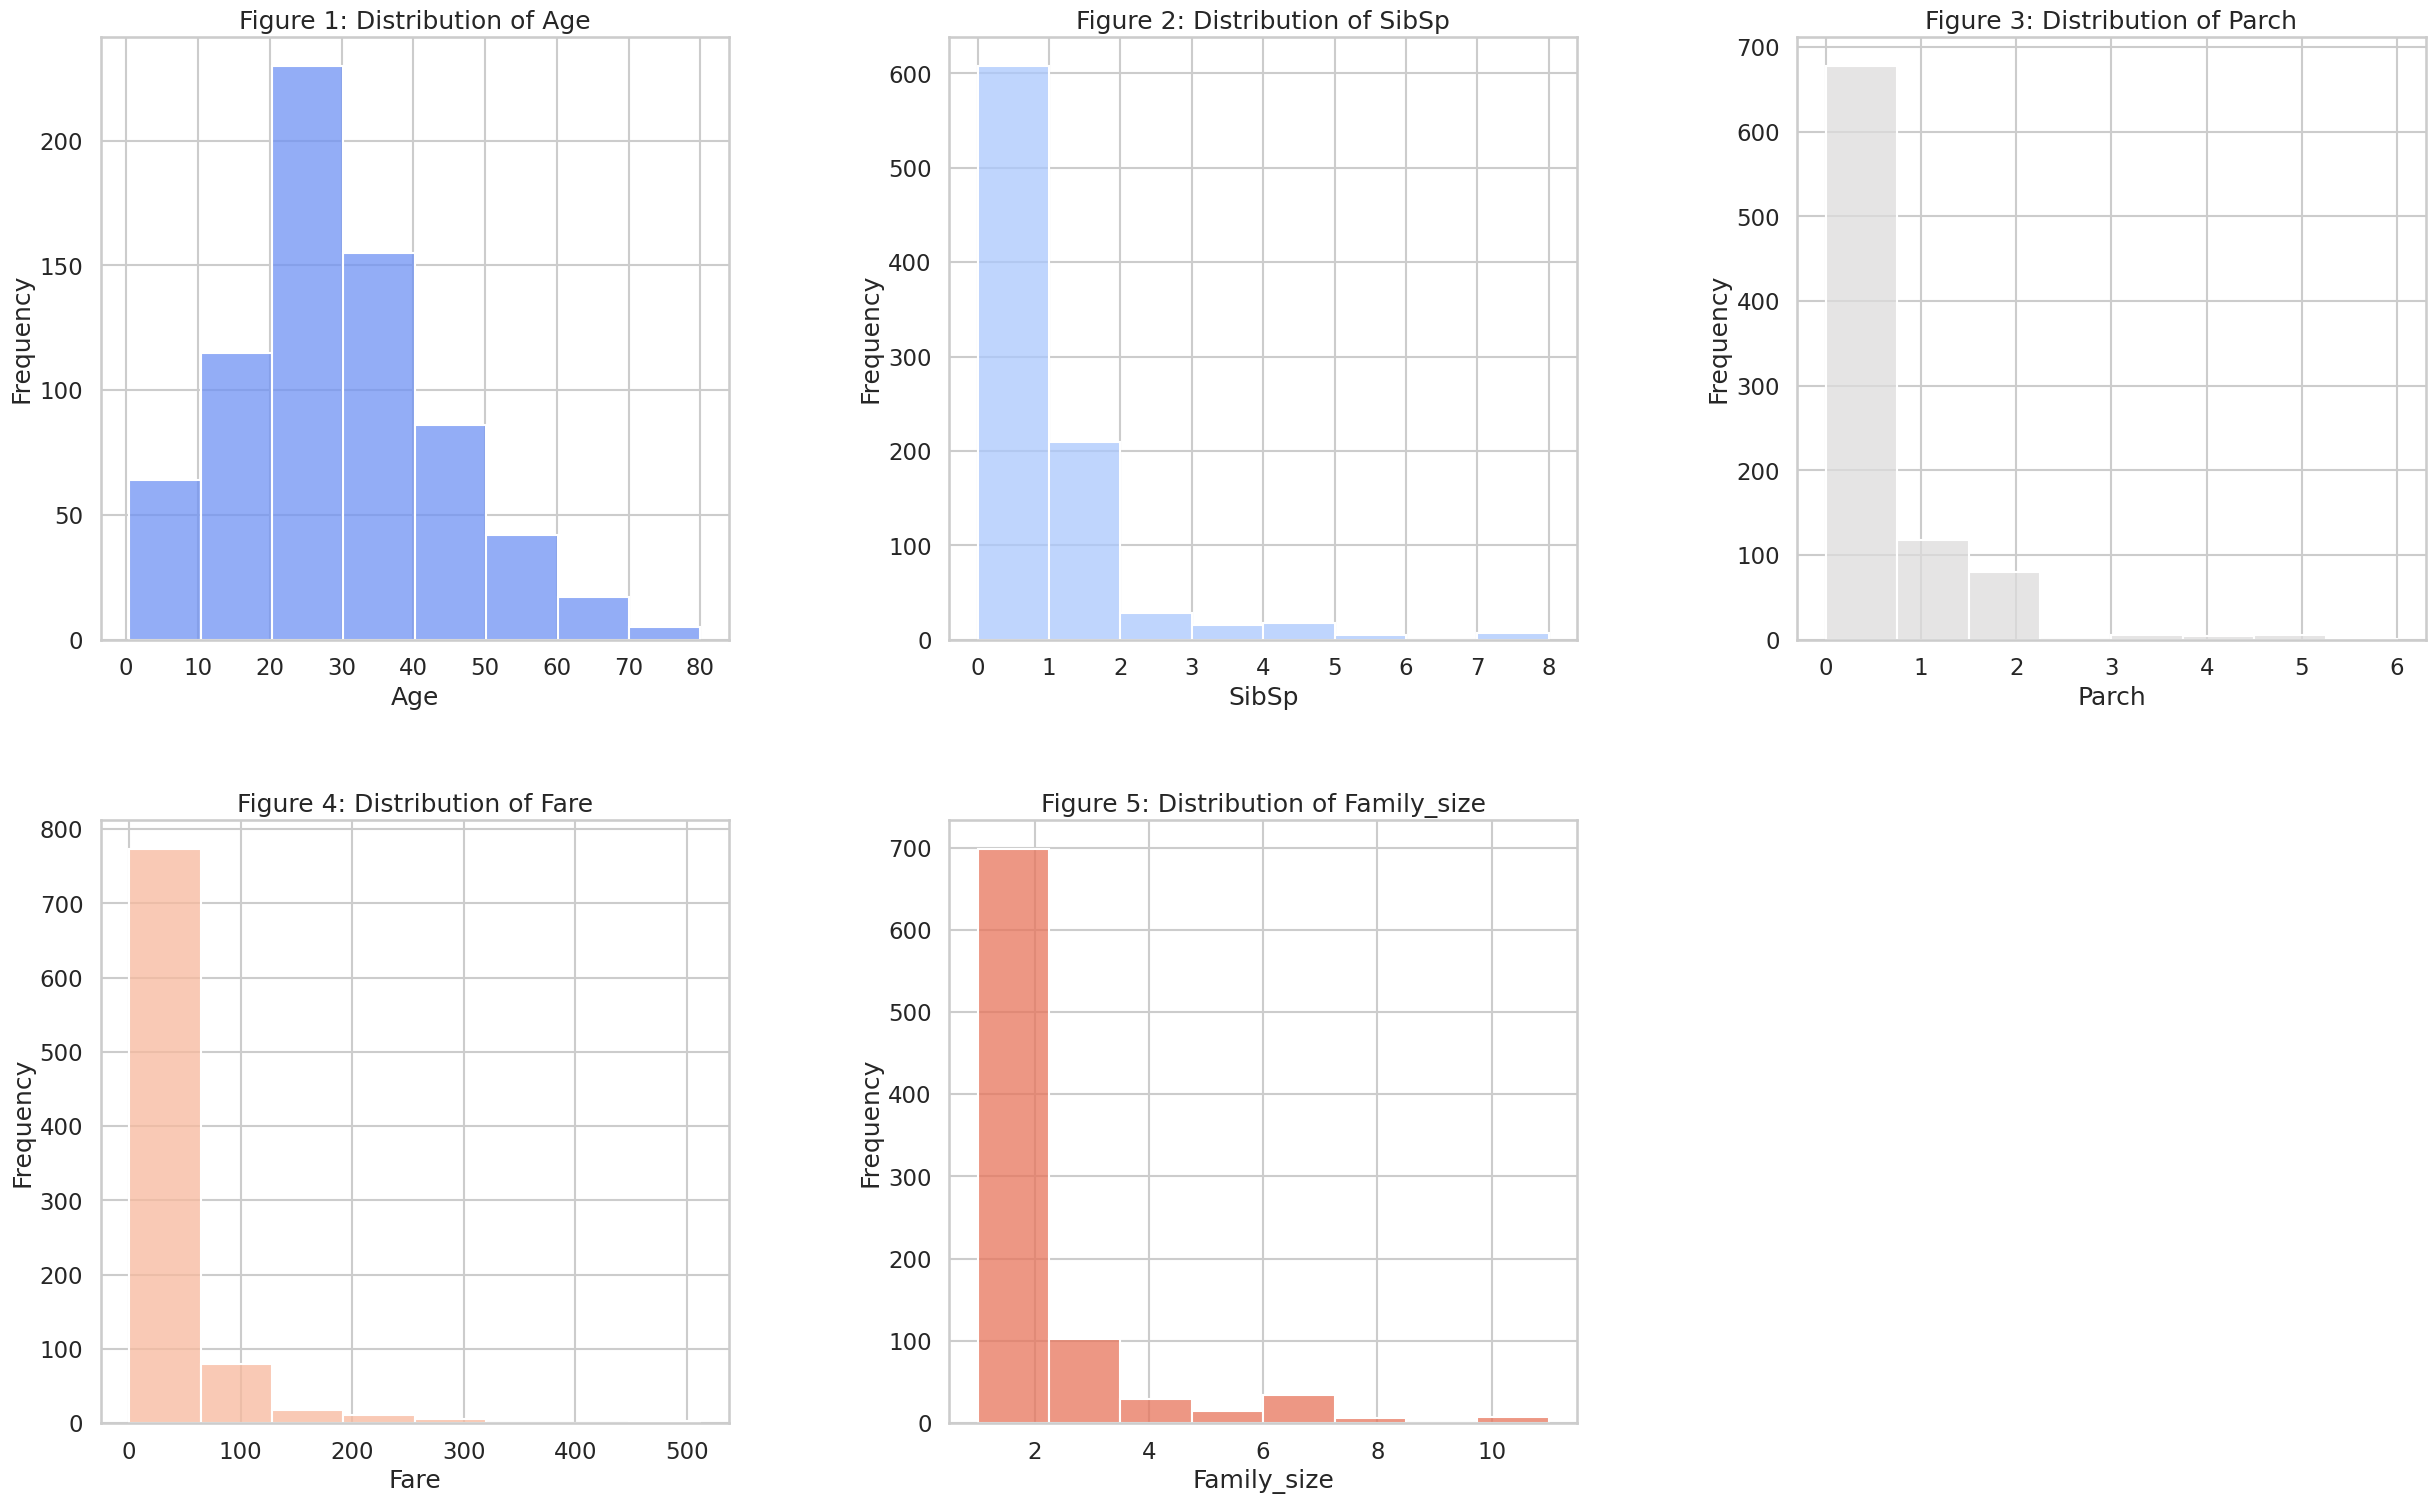

In [43]:
numerical_columns = ["Age", "SibSp", "Parch", "Fare", "Family_size"]
numerical_df = titanic_data[numerical_columns]

fig = plt.figure(figsize=(30, 18))
plt.subplots_adjust(hspace=0.3, wspace=0.35)

palette = sns.color_palette("coolwarm", n_colors=5)  # Using 'coolwarm' for contrast and clarity

def check_skew(skewness, index):
    if skewness > 0:
        print(f"Асиметрія графіку {index + 1}: {skewness:.2f}. Розподіл має важчий правий хвіст.")
    elif skewness < 0:
        print(f"Асиметрія графіку {index + 1}: {skewness:.2f}. Розподіл має важчий лівий хвіст.")
    else:
        print(f"Розподіл графіку {index + 1} симетричний.")

for index, column in enumerate(numerical_df.columns):
    ax = plt.subplot(2, 3, index + 1)
    sns.histplot(data=numerical_df, x=column, bins=8, color=palette[index % len(palette)], ax=ax)
    ax.set_title(f"Figure {index + 1}: Distribution of {column}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(column)

    skewness = numerical_df[column].skew()
    check_skew(skewness, index)

plt.show()

***Аналіз розподілу числових змінних у датасеті Titanic:***

1. **Вік (Age):**
   - Розподіл віку пасажирів має форму, що нагадує нормальний розподіл, але з вираженим правим хвостом. Це свідчить про переважання молодших пасажирів, з основною концентрацією людей віком від 20 до 30 років. Найменше представлено пасажирів старше 70 років.

2. **Кількість братів, сестер, супругів (SibSp):**
   - Розподіл показує експоненційне зниження з збільшенням кількості родичів. Більшість пасажирів подорожували без супутніх братів, сестер або супругів.

3. **Кількість батьків або дітей (Parch):**
   - Аналогічно до `SibSp`, дані відображають експоненційний розподіл. Переважна більшість пасажирів не мала батьків або дітей на борту, з незначною кількістю пасажирів, які мали одного або більше членів сім'ї.

4. **Ціна квитка (Fare):**
   - Розподіл ціни квитків показує сильний відхил в бік низьких вартостей з кількома високими піковими значеннями, що досягають до 500 доларів. Зниження кількості пасажирів з підвищенням ціни свідчить про експоненційний розподіл.

5. **Розмір сім'ї (Family_size):**
   - Розподіл розміру сім'ї пасажирів також має експоненційну форму, з найбільшою кількістю пасажирів, які подорожували самотньо. Сім'ї більше трьох членів були значно рідше.

***Загальний висновок:***
Розподіл числових змінних підкреслює кілька ключових аспектів поведінки пасажирів Titanic. Особливо це стосується молодих людей, які були основною віковою групою на борту. Експоненційний розподіл кількості родичів і цін на квитки вказує на соціально-економічну структуру пасажирів, де більшість мала обмежений сімейний або фінансовий супровід. Ці дані можуть бути корисні для розуміння соціальних шаблонів та їх впливу на виживаність в кризових ситуаціях.


##Співвіднонешшя між всіма числовими змінними
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

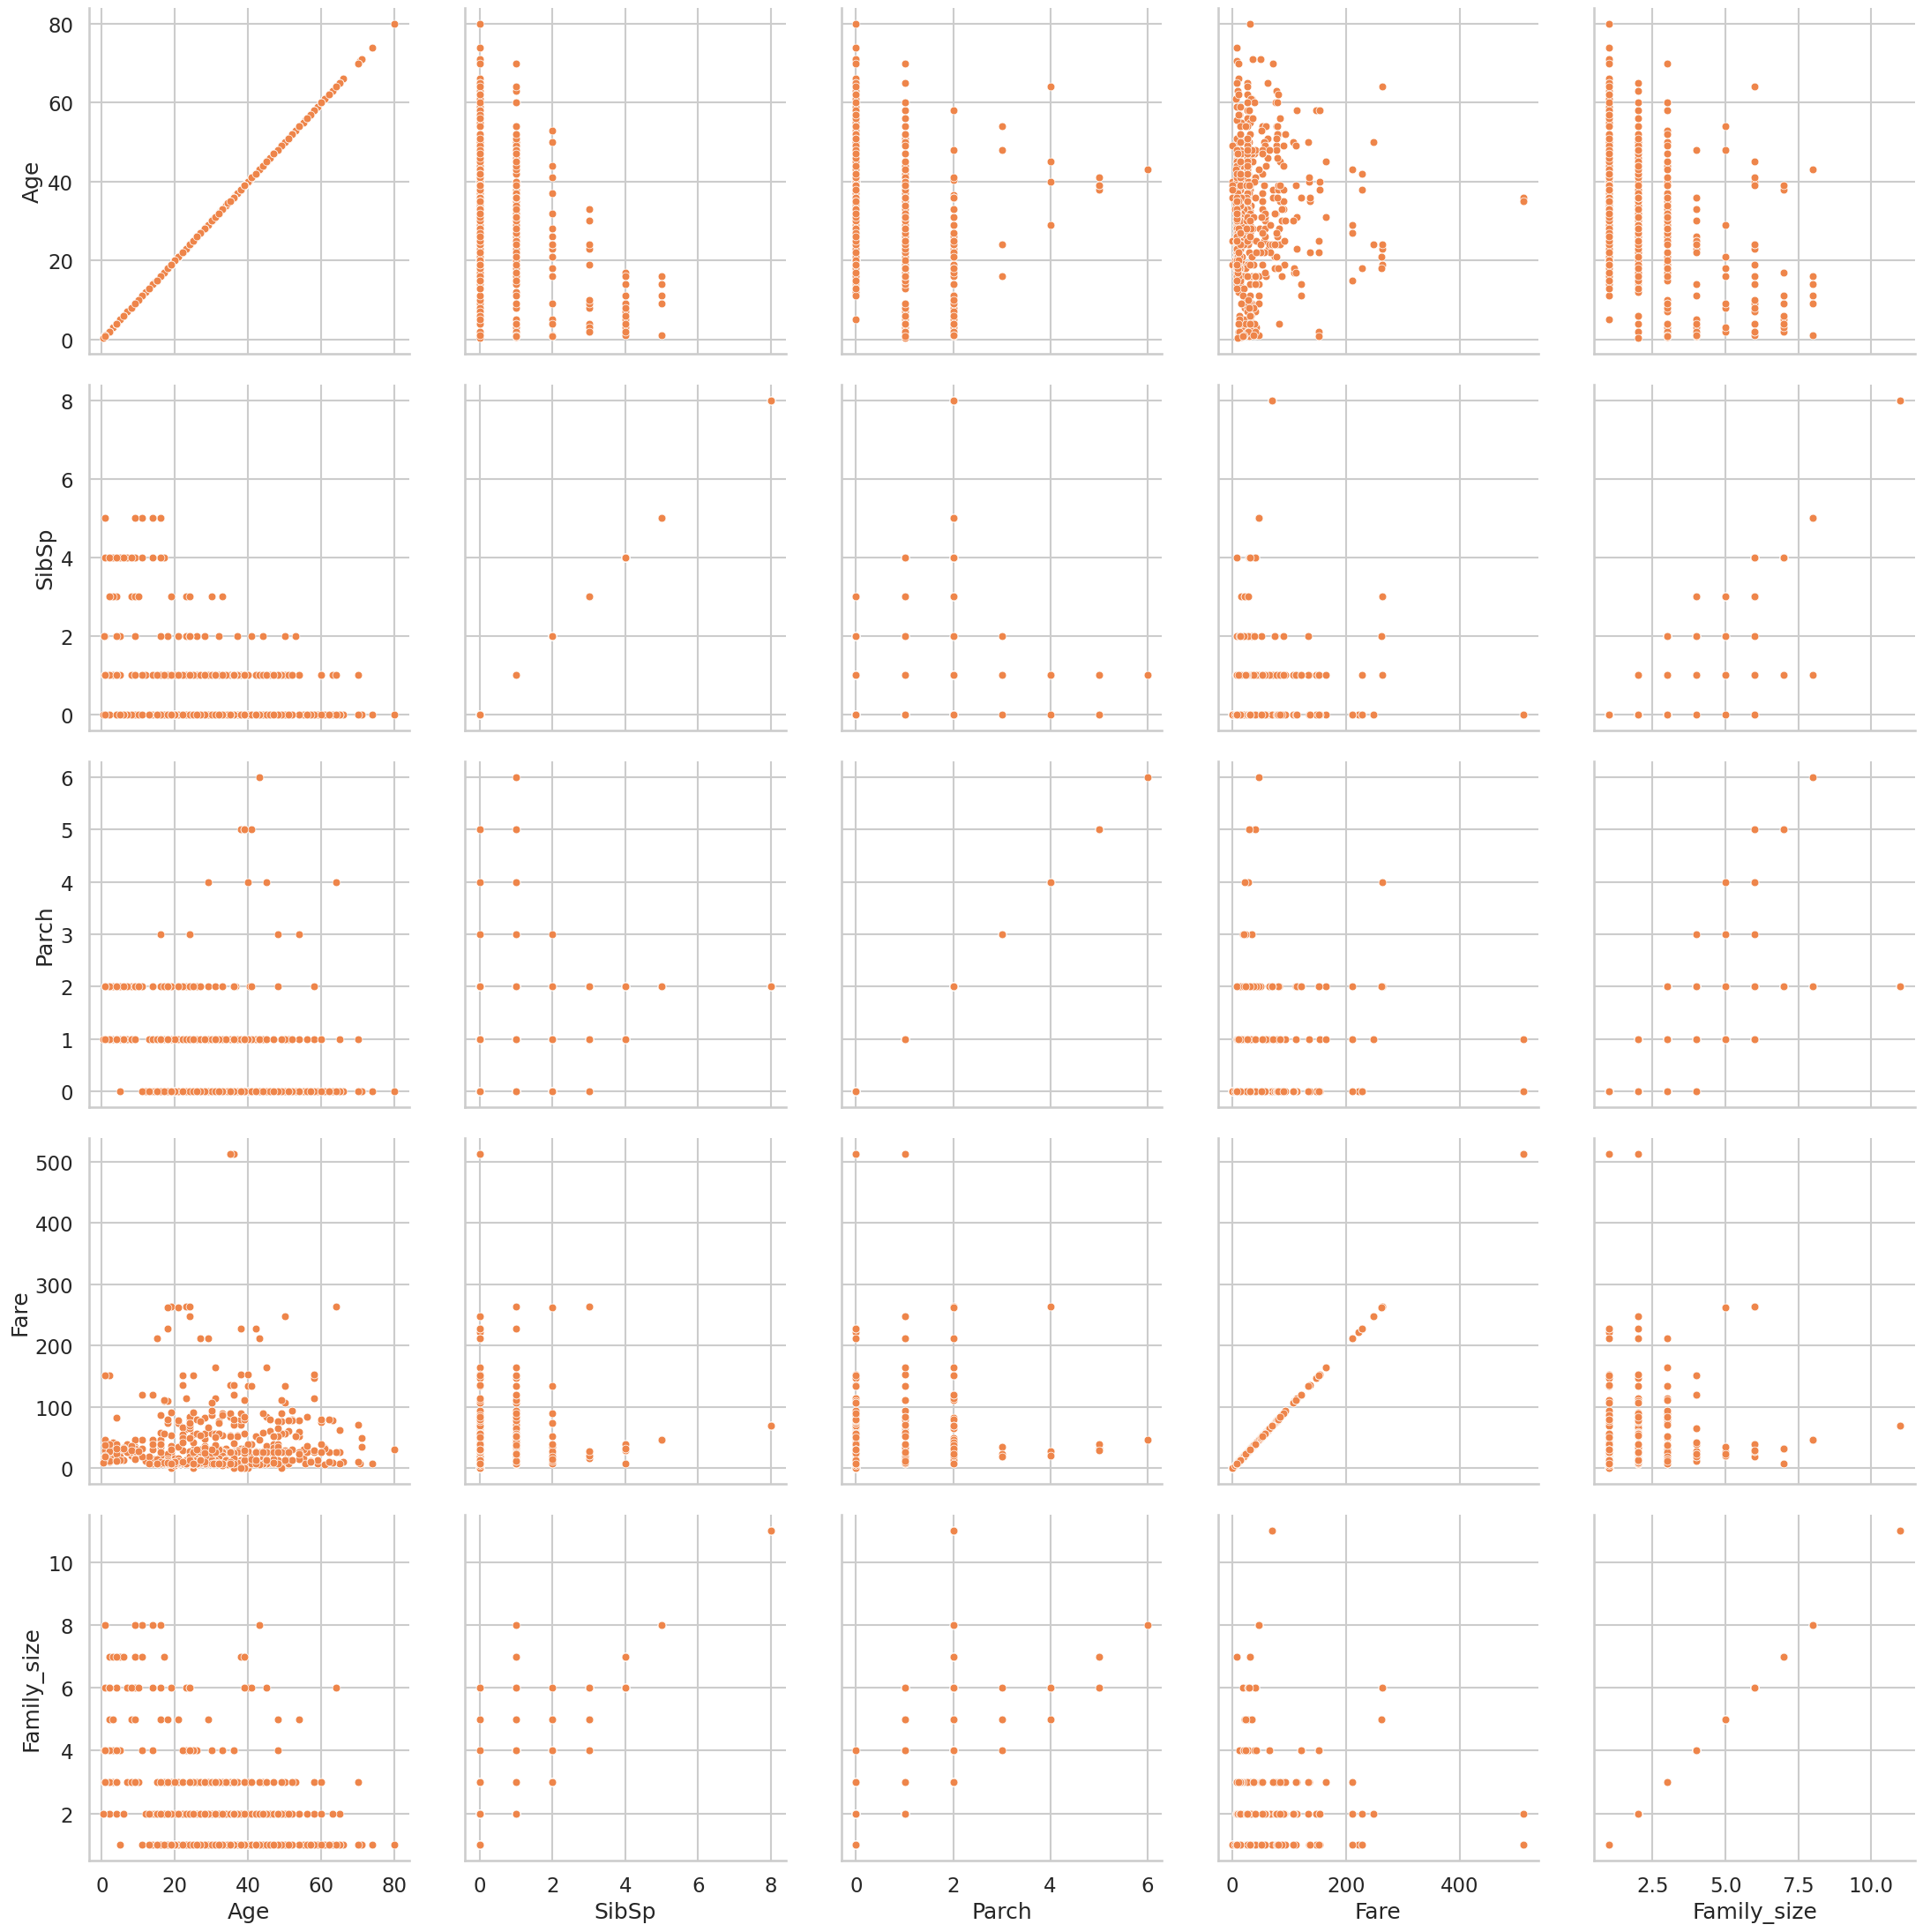

In [47]:
numerical_pairs_matrix = sns.PairGrid(numerical_df, height=4.5)
numerical_pairs_matrix.map(sns.scatterplot, color=sns.color_palette("muted")[1], s=40)

plt.show()

***Висновки щодо аналізу співвідношень між числовими змінними в датасеті Titanic:***

1. **Змінна Age (Вік):**
   - Відношення віку до кількості братів, сестер або супругів (SibSp) показує обернену залежність: зі збільшенням числа родичів, середній вік пасажирів зменшується. Це може вказувати на те, що молодші люди частіше подорожують з родичами. Помічені викиди слід розглядати уважніше, адже вони можуть впливати на аналіз.

2. **Змінна SibSp (Кількість братів, сестер або супругів на борту):**
   - Має чіткий зв'язок із змінною Parch (кількість батьків або дітей на борту), що логічно, оскільки обидві ці змінні входять до розрахунку загальної кількості членів родини. Аномальні значення, які спостерігаються, вимагають детальнішого аналізу для визначення їх природи та впливу на загальні висновки.

3. **Змінна Parch (Кількість батьків або дітей на борту):**
   - Ілюструє цікаву тенденцію у відношенні до вартості квитка (Fare): пасажири з більшою кількістю дітей/батьків мали нижчі ціни на квитки. Це може свідчити про вибір економічніших опцій для більших родин. Наявність викидів також потрібно розглядати окремо для уточнення можливих помилок або особливостей даних.

***Загальна рекомендація:***
Співвідношення числових змінних демонструє важливість врахування взаємодії між різними атрибутами при аналізі даних. Викиди, зокрема, заслуговують на увагу, оскільки можуть вказувати на потенційні помилки в даних або на нестандартні ситуації, що мають аналітичне значення. Детальний аналіз співвідношень може також підказати потребу у створенні нових похідних змінних, які б могли покращити якість моделей машинного навчання.



Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.